# Sheet 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt
%matplotlib inline

## 1 Principal Component Analysis
### (a)

In [4]:
# TODO: implement PCA (fill in the blanks in the function below)

def pca(data, n_components=None):
    """
    Principal Component Analysis on a p x N data matrix.
    
    Parameters
    ----------
    data : np.ndarray
        Data matrix of shape (p, N).
    n_components : int, optional
        Number of requested components. By default returns all components.
        
    Returns
    -------
    np.ndarray, np.ndarray
        the pca components (shape (n_components, p)) and the projection (shape (n_components, N))

    """
        # set n_components to p by default
    n_components = data.shape[0] if n_components is None else n_components
    assert n_components <= data.shape[0], f"Got n_components larger than dimensionality of data!"
    
    N = data.shape[1]
    # center the data
    x = np.matmul(data,np.identity(N)-np.ones((N,N))/N)
    # compute X times X transpose
    xx = np.matmul(x,x.T)
    # compute the eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(xx)
    # sort the eigenvectors by eigenvalue and take the n_components largest ones
    ind = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[ind]
    eigenvectors = eigenvectors[ind]
    W = eigenvectors[:n_components]
    # compute X_projected, the projection of the data to the components
    X_projected = np.matmul(W,x)
    
    return W, X_projected  # return the n_components first components and the pca projection of the data


In [22]:
# Example data to test your implementation 
# All the asserts on the bottom should go through if your implementation is correct

data = np.array([
    [ 1,  0,  0, -1,  0,  0],
    [ 0,  3,  0,  0, -3,  0],
    [ 0,  0,  5,  0,  0, -5]
], dtype=np.float32)

# add a random offset to all samples. it should not affect the results
data += np.random.randn(data.shape[0], 1)

n_components = 2
components, projection = pca(data, n_components=n_components)  # apply your implementation

# the correct results are known (up to some signs)
true_components = np.array([[0, 0, 1], [0, 1, 0]], dtype=np.float32)
true_projection = np.array([
    [ 0,  0,  5,  0,  0, -5],
    [ 0,  3,  0,  0, -3,  0]
], dtype=np.float32)

# check that components match, up to sign
assert isinstance(components, np.ndarray), f'Expected components to be numpy array but got {type(components)}'
assert components.shape == true_components.shape, f'{components.shape}!={true_components.shape}'
assert np.allclose(np.abs(components * true_components).sum(1), np.ones(n_components)), f'Components not matching'

# check that projections agree, taking into account potentially flipped components
assert isinstance(projection, np.ndarray), f'Expected projection to be numpy array but got {type(projection)}'
assert projection.shape == (n_components, data.shape[1]), f'Incorrect shape of projection: Expected {(n_components, data.shape[1])}, got {projection.shape}'
assert np.allclose(projection, true_projection * (components * true_components).sum(1, keepdims=True), atol=1e-6), f'Projections not matching'

print('Test successful!')

Test successful!


### (b)

Load the data (it is a subset of the data at https://opendata.cern.ch/record/4910#)

In [23]:
features = np.load('data/dijet_features.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks

print(f'{features.shape=}, {labels.shape=}')  # print the shapes

# TODO: print how many samples of each class are present in the data (hint: numpy.unique)·

features.shape=(116, 2233), labels.shape=(2233,)


In [28]:
range_f = np.zeros((features.shape[1],2))
norm_f = np.zeros(features.shape)
for i in range(features.shape[0]):
    range_f[i,0] = np.min(features[i,:])
    range_f[i,1] = np.max(features[i,:])
    norm_f[i,:] = (features[i,:] - np.mean(features[i,:]))/np.std(features[i,:])
    

[[ 0.33210345  1.30007125  1.52759653 ... -1.36273098  0.90376974
   0.48255366]
 [-2.22471373 -2.14579852 -2.76593321 ...  0.64082471 -2.37736961
  -2.218198  ]
 [-0.56573743 -0.2162089  -0.48902423 ...  0.86217185 -0.67211634
  -0.96286893]
 ...
 [-0.16613756 -0.16613756 -0.16613756 ... -0.16613756 -0.16613756
  -0.16613756]
 [-0.16565627 -0.16565627 -0.16565627 ... -0.16565627 -0.16565627
  -0.16565627]
 [-0.16364375 -0.16364375 -0.16364375 ... -0.16364375 -0.16364375
  -0.16364375]]


In [30]:
range_f = np.column_stack((np.min(features, axis=1), np.max(features, axis=1)))

# Normalize each row
norm_f2 = (features - np.mean(features, axis=1, keepdims=True)) / np.std(features, axis=1, keepdims=True)

Text(0.5, 0, 'x')

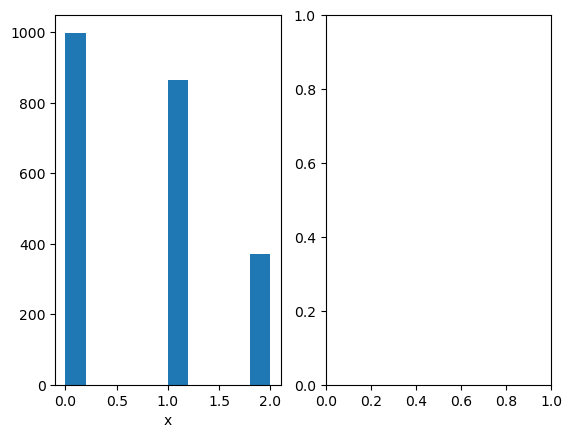

In [18]:
fig, ax = plt.subplots(1, 2)
ax[0].hist(labels)
ax[0].set_xlabel('x')
ax[1].hist(features)

Normalize the data

In [ ]:
# TODO: report range of features and normalize the data to zero mean and unit variance


### (c)
Compute a 2D PCA projection and make a scatterplot of the result, once without color, once coloring the dots by label. Interpret your results.

In [ ]:
# TODO: apply PCA as implemented in (a)


In [ ]:
# TODO: make a scatterplot of the PCA projection


In [ ]:
# TODO: make a scatterplot, coloring the dots by their label and including a legend with the label names
# (hint: one way is to call plt.scatter once for each of the three possible labels. Why could it be problematic to scatter the data sorted by labels though?)


## 2 Nonlinear Dimension Reduction

In [ ]:
import umap  # import umap-learn, see https://umap-learn.readthedocs.io/

In [ ]:
# if you have not done 1(b) yet, you can load the normalized features directly:
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks

### (a)

In [ ]:
# TODO: Apply umap on the normalized jet features from excercise 1. It will take a couple of seconds.
# note: umap uses a different convention regarding the feature- and sample dimension, N x p instead of p x N!

reducer = umap.UMAP()

In [ ]:
# TODO: make a scatterplot of the UMAP projection

# TODO: make a scatterplot, coloring the dots by their label and including a legend with the label names

### (b)

In [ ]:
for n_neighbors in (2, 4, 8, 15, 30, 60, 100):
    # TODO: repeat the above, varying the n_neighbors parameter of UMAP
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    